In [ ]:
import os

city = 'alfenas'
path_city_files = os.getcwd() + '\\database\\' + city
path_refined_measures = path_city_files + '\\' + city + '_medidas_refinadas.csv'
path_measures = path_city_files + '\\' + city + '_medidas.csv'
path_graph = path_city_files + '\\' + city + '.graphml'
path_police_data = os.getcwd() + '\\cities-data\\DadosRefinados_' + city + '.csv'

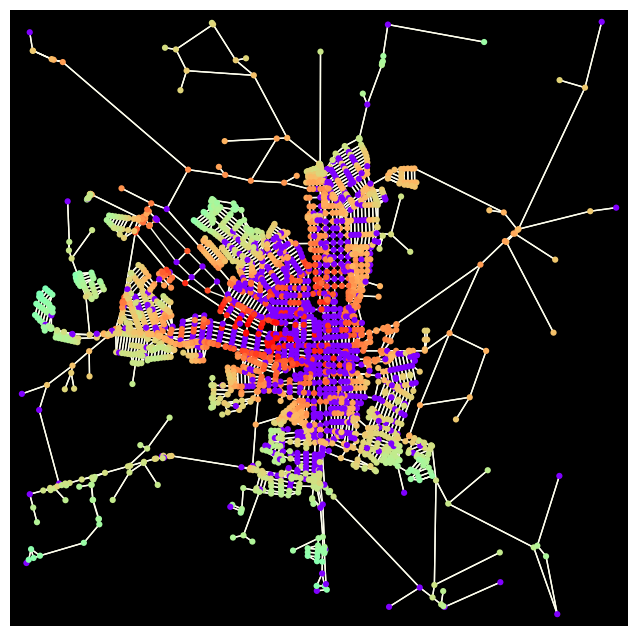

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
from matplotlib import pyplot as plt
import networkx as nx
import pandas as pd
import osmnx as ox
from sklearn.preprocessing import MinMaxScaler

dadoscalculados = pd.read_csv(path_measures)
#dadossemoutliers = dadoscalculados[dadoscalculados['closeness_centrality'] >= 0.02]
dadossemoutliers = dadoscalculados.drop('latitude e longitude', axis = 1)
dadossemoutliers = dadossemoutliers.drop('Unnamed: 0', axis = 1)

scaler = MinMaxScaler()
dadosnormalizedarray = scaler.fit_transform(dadossemoutliers)
colunas = ['closeness_centrality', 'betweenes_centrality', 'degree_centrality', 'eigenvector_centrality', 'pagerank_centrality', 'quantidade_ocorrencia', 'distancia_universidade', 'quantidade_ocorrencia_2']
dadosnormalizedsemoutlier = pd.DataFrame(dadosnormalizedarray, columns = colunas)

dados = dadosnormalizedsemoutlier[dadosnormalizedsemoutlier['closeness_centrality'] > 0.2]
dados = dados[dados['quantidade_ocorrencia'] == 0]

nr_nodes = nx.number_of_nodes(G)
ocorrencias = {i: 0 for i in range(nr_nodes)}

dictcloseness = dados['closeness_centrality'].to_dict();

sem_ocorrencias = ocorrencias | dictcloseness

G = ox.load_graphml(path_city_files + '\\' + city + '.graphml')
G = nx.convert_node_labels_to_integers(G, first_label=0, ordering='default', label_attribute='old_index')

nx.set_node_attributes(G, sem_ocorrencias, name="sem_ocorrencias")
cores_ocorrencias = ox.plot.get_node_colors_by_attr(G, "sem_ocorrencias", cmap="rainbow")

for u, v, data in G.edges.data():
    data.clear()

ox.plot.plot_graph(
   G, bgcolor="k", node_color=cores_ocorrencias, node_size=20, edge_linewidth=1, edge_color="#ffffee"
)